In [10]:
############# Plotting cell
%matplotlib inline

import matplotlib.pylab as plt

In [2]:
import sys
#sys.path.append('/home/naylor/Documents/Python/PhD/PhD_Fabien/')
sys.path.append('/data/users/pnaylor/Documents/Python/PhD_Fabien')
import os
import caffe
import numpy as np
import glob
import random
from skimage.io import imread as ir

caffe.set_mode_gpu()
number_images = 5

root_directory = "/home/naylor/Documents/Python/PhD/dataFCN/"
root_directory = "/data/users/pnaylor/Documents/Python/FCN/"
input_images = "/home/naylor/Documents/Python/PhD/dataFCN/RGB/"
input_images = "/data/users/pnaylor/Documents/RGB/"

weight32 = os.path.join(root_directory, "FCN2", "snapshot","snapshot_iter_40000.caffemodel" )
weight16 = os.path.join(root_directory, "FCN16", "snapshot","snapshot_iter_40000.caffemodel" )
weight8  = os.path.join(root_directory, "FCN8", "snapshot","snapshot_iter_10000.caffemodel" )

def CheckFile(path):
    assert os.path.isfile(path)

CheckFile(weight32)
CheckFile(weight16)
CheckFile(weight8)

image_files = glob.glob( os.path.join(input_images, "*.png") )
random.shuffle(image_files)
test_images = image_files[0:number_images]

In [8]:
folder = '/Users/naylorpeter/Documents/Python/Results/first{}/*.npy'

scores_files = {el:glob.glob(folder.format(el)) for el in [8, 16, 32]}
loss_color_files = {8:"-r", 16:"-b", 32: "-g"}
color_files = {'acc':("-b", "Overall accuracy"), 'acc1':("-r","Mean accuracy"), 
               "iu":("-y", "Intersection over union"), "fwavacc":("-g","Weighted Jaccard Index")}

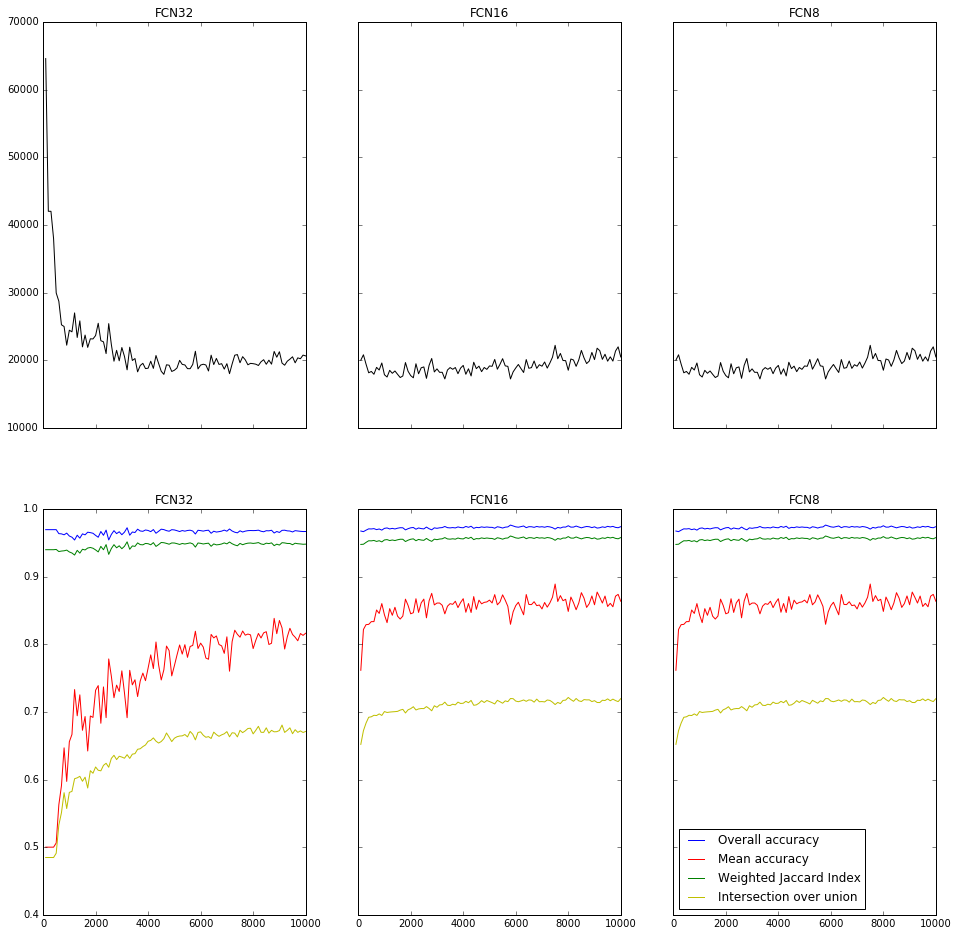

In [29]:
n_iter = 10000
disp_interval = 100
iterations = range(disp_interval, n_iter+disp_interval, disp_interval)

fig, axes = plt.subplots(2, 3, figsize=(16, 16),
                         sharex='col', sharey='row')

for k in scores_files.keys():
    if k == 8:
        j = 2
        title = "FCN8"
    elif k== 16:
        j = 1
        title = "FCN16"
    else:
        j = 0
        title = "FCN32"
    
    npy_list = scores_files[k]
    for el in npy_list:
        curve = np.load(el)
        name = el.split('/')[-1].split('.')[0]
        if name == "loss":
            i = 0
            col = "-k"
            label = "loss"
            
        else:
            i = 1
            col = color_files[name][0]
            label = color_files[name][1]
        axes[i,j].set_title(title)
        axes[i,j].plot(iterations, curve, col, label = label)
plt.legend(loc = 3)
plt.show()

In [3]:
### Checking the size of images..
image = test_images[0]
img = ir(image)
## as caffe works with blobs...
## Setting image files
x, y, z = img.shape
image_array = np.zeros(shape=(len(test_images), x, y, z-1)) ## they have 4 dimensions
i = 0
for image in test_images:
    image_array[i,:,:,:] = ir(image)[:,:,0:3]
    i += 1

0
1
2


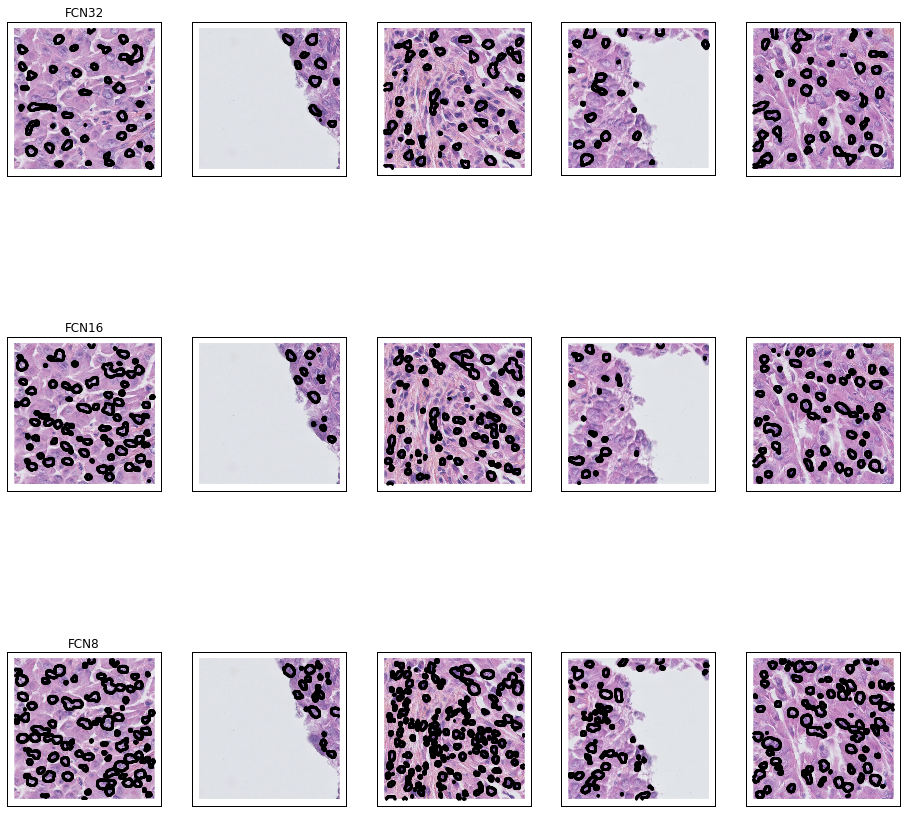

In [4]:
from UsefulFunctions.usefulPloting import Contours
from FCN_Segmentation.ShortPrediction import All

fig, axes = plt.subplots(3, 5, figsize=(16, 16),
                         subplot_kw={'xticks': [], 'yticks': []})

w_dic = {0:weight32, 1:weight16, 2:weight8}

d_dic = {0:"/data/users/pnaylor/deploy.prototxt",
         1:"/data/users/pnaylor/Documents/Python/FCN/FCN16/deploy.prototxt",
         2:"/data/users/pnaylor/Documents/Python/FCN/FCN8/deploy.prototxt"}

w_names = {0:"FCN32", 1:"FCN16", 2:"FCN8"}

score_layer = {0:"score2", 1:"score", 2:"score"}
import pdb
for i in range(3):
    w_file = w_dic[i]
    CheckFile(d_dic[i])
    #pdb.set_trace()
    t = All(d_dic[i], w_file, image_array, score_layer[i])    
    for j in range(5):
        ContourSegmentation = Contours(t[j,:,:])
        x_, y_ = np.where(ContourSegmentation.transpose() > 0)
        axes[i,j].imshow(ir(test_images[j]))
        axes[i,j].scatter(x=x_, y=y_, c='r', s=1)
        if j == 0:
            axes[i,j].set_title(w_names[i])

plt.show()